In [1]:
from sklearn.preprocessing import StandardScaler
def normalize(data, boundary):
    scaler = StandardScaler()
    scaler.fit(data[:boundary])
    ndata = scaler.transform(data)
    return ndata

In [2]:
#Building the time series dataset 
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

def modelfn(df, use_sentiment=False):
    input_data = df[['Open', 'High', 'Low', 'Close', 'Volume']].values
    if(use_sentiment==True):
        print('Using sentiment..')
        input_data = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment Score']].values 
    targets = df['Return'].values
    T = 10                            #Time window for getting sequences for the autoregressive RNN model
    D = input_data.shape[1]
    N = len(input_data) - T
    ntrain = len(input_data) * 4 // 5  #80% data is for training, 20% is for validating
    input_data = normalize(input_data, ntrain+T)

    #Train set
    import numpy as np
    X_train = np.zeros((ntrain, T, D))
    Y_train = np.zeros(ntrain)
    for t in range(ntrain):
        X_train[t, :, :] = input_data[t:t+T]
        Y_train[t] = (targets[t+T] > 0)

    #Test set
    X_test = np.zeros((N-ntrain, T, D))
    Y_test = np.zeros(N-ntrain)
    for v in range(N-ntrain):
        t = v + ntrain
        X_test[v, :, :] = input_data[t:t+T]
        Y_test[v] = (targets[t+T] > 0)

    i = keras.layers.Input((T, D))
    h = keras.layers.LSTM(50)(i)
    o = keras.layers.Dense(1, activation='sigmoid')(h)
    fmodel = keras.models.Model(i,o)
    fmodel.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])

    res = fmodel.fit(X_train, Y_train, batch_size=32, epochs=300, validation_data=(X_test, Y_test))

    plt.plot(res.history['loss'], label='Train error')
    plt.plot(res.history['val_loss'], label='Test error')
    plt.legend()
    plt.show()
    plt.plot(res.history['accuracy'], label='Train accuracy')
    plt.plot(res.history['val_accuracy'], label='Test accuracy')
    plt.legend()
    plt.show()
    return (fmodel, X_train, X_test, Y_test)


In [3]:
import pandas as pd
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

df =  pd.read_csv('data/GOOGL_with_sentiment.csv')
df['PrevClose'] = df['Close'].shift(1)
df['Return'] = (df['Close'] - df['PrevClose'])/df['PrevClose']
df_ns = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Return']]
df_s = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Sentiment Score', 'Return']]

Epoch 1/300
7/7 [==============================] - 0s 68ms/step - loss: 0.6989 - accuracy: 0.4627 - val_loss: 0.7558 - val_accuracy: 0.3659
Epoch 2/300
7/7 [==============================] - 0s 8ms/step - loss: 0.6881 - accuracy: 0.5622 - val_loss: 0.6955 - val_accuracy: 0.5366
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6856 - accuracy: 0.5473 - val_loss: 0.7138 - val_accuracy: 0.4634
Epoch 4/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6831 - accuracy: 0.5672 - val_loss: 0.7172 - val_accuracy: 0.4634
Epoch 5/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6797 - accuracy: 0.5821 - val_loss: 0.7601 - val_accuracy: 0.3902
Epoch 6/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6785 - accuracy: 0.5771 - val_loss: 0.7953 - val_accuracy: 0.4146
Epoch 7/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6758 - accuracy: 0.5771 - val_loss: 0.8480 - val_accuracy: 0.4146
Epoch 8/300
7/7 [=========

7/7 [==============================] - 0s 6ms/step - loss: 0.6403 - accuracy: 0.6070 - val_loss: 0.7912 - val_accuracy: 0.4146
Epoch 60/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6374 - accuracy: 0.6269 - val_loss: 0.8453 - val_accuracy: 0.4146
Epoch 61/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6399 - accuracy: 0.6070 - val_loss: 0.9475 - val_accuracy: 0.3902
Epoch 62/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6424 - accuracy: 0.6119 - val_loss: 0.9132 - val_accuracy: 0.3902
Epoch 63/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6367 - accuracy: 0.6219 - val_loss: 0.8553 - val_accuracy: 0.3902
Epoch 64/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6338 - accuracy: 0.6517 - val_loss: 0.7695 - val_accuracy: 0.4390
Epoch 65/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6451 - accuracy: 0.6368 - val_loss: 0.7371 - val_accuracy: 0.4390
Epoch 66/300
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 0.6179 - accuracy: 0.6468 - val_loss: 0.9024 - val_accuracy: 0.3415
Epoch 118/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6094 - accuracy: 0.6468 - val_loss: 0.8140 - val_accuracy: 0.3659
Epoch 119/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6062 - accuracy: 0.6517 - val_loss: 0.8323 - val_accuracy: 0.3659
Epoch 120/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6058 - accuracy: 0.6517 - val_loss: 0.8592 - val_accuracy: 0.3659
Epoch 121/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6029 - accuracy: 0.6716 - val_loss: 0.8937 - val_accuracy: 0.3659
Epoch 122/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6034 - accuracy: 0.6816 - val_loss: 0.8667 - val_accuracy: 0.3902
Epoch 123/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6004 - accuracy: 0.6866 - val_loss: 0.8966 - val_accuracy: 0.3659
Epoch 124/300
7/7 [========

7/7 [==============================] - 0s 5ms/step - loss: 0.5292 - accuracy: 0.7214 - val_loss: 0.9393 - val_accuracy: 0.3659
Epoch 176/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5278 - accuracy: 0.7313 - val_loss: 0.9619 - val_accuracy: 0.4146
Epoch 177/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5292 - accuracy: 0.7264 - val_loss: 0.9521 - val_accuracy: 0.3902
Epoch 178/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5219 - accuracy: 0.7363 - val_loss: 0.9566 - val_accuracy: 0.3659
Epoch 179/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5175 - accuracy: 0.7512 - val_loss: 0.9475 - val_accuracy: 0.3902
Epoch 180/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5148 - accuracy: 0.7562 - val_loss: 0.9336 - val_accuracy: 0.3902
Epoch 181/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5137 - accuracy: 0.7612 - val_loss: 0.9068 - val_accuracy: 0.3659
Epoch 182/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.3895 - accuracy: 0.8308 - val_loss: 1.0623 - val_accuracy: 0.3659
Epoch 234/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3794 - accuracy: 0.8408 - val_loss: 1.0514 - val_accuracy: 0.3902
Epoch 235/300
7/7 [==============================] - 0s 7ms/step - loss: 0.3727 - accuracy: 0.8209 - val_loss: 1.0915 - val_accuracy: 0.3902
Epoch 236/300
7/7 [==============================] - 0s 7ms/step - loss: 0.3719 - accuracy: 0.8358 - val_loss: 1.0774 - val_accuracy: 0.3902
Epoch 237/300
7/7 [==============================] - 0s 7ms/step - loss: 0.3682 - accuracy: 0.8308 - val_loss: 1.0712 - val_accuracy: 0.3902
Epoch 238/300
7/7 [==============================] - 0s 7ms/step - loss: 0.3668 - accuracy: 0.8308 - val_loss: 1.0789 - val_accuracy: 0.3902
Epoch 239/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3649 - accuracy: 0.8259 - val_loss: 1.1111 - val_accuracy: 0.3902
Epoch 240/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.2518 - accuracy: 0.8905 - val_loss: 1.2579 - val_accuracy: 0.3902
Epoch 292/300
7/7 [==============================] - 0s 5ms/step - loss: 0.2451 - accuracy: 0.9005 - val_loss: 1.3263 - val_accuracy: 0.3902
Epoch 293/300
7/7 [==============================] - 0s 5ms/step - loss: 0.2488 - accuracy: 0.8955 - val_loss: 1.3596 - val_accuracy: 0.3902
Epoch 294/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2501 - accuracy: 0.8905 - val_loss: 1.3315 - val_accuracy: 0.3902
Epoch 295/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2425 - accuracy: 0.9005 - val_loss: 1.4602 - val_accuracy: 0.3902
Epoch 296/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2405 - accuracy: 0.8955 - val_loss: 1.4223 - val_accuracy: 0.3902
Epoch 297/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2354 - accuracy: 0.8856 - val_loss: 1.3486 - val_accuracy: 0.4146
Epoch 298/300
7/7 [========

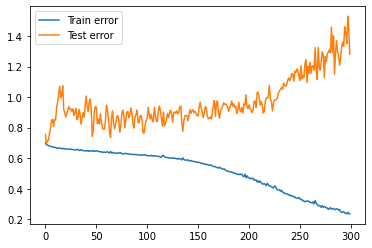

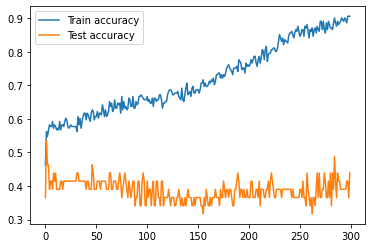

In [4]:
#Without sentiment
fmodelns, X_train_ns, X_test_ns, Y_test_ns = modelfn(df, use_sentiment=False)

Using sentiment..
Epoch 1/300
7/7 [==============================] - 1s 96ms/step - loss: 0.7029 - accuracy: 0.5224 - val_loss: 0.7286 - val_accuracy: 0.4146
Epoch 2/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6903 - accuracy: 0.5522 - val_loss: 0.6956 - val_accuracy: 0.5122
Epoch 3/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6855 - accuracy: 0.5373 - val_loss: 0.7003 - val_accuracy: 0.5122
Epoch 4/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6822 - accuracy: 0.5423 - val_loss: 0.7043 - val_accuracy: 0.4878
Epoch 5/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6808 - accuracy: 0.5323 - val_loss: 0.7348 - val_accuracy: 0.3902
Epoch 6/300
7/7 [==============================] - 0s 7ms/step - loss: 0.6798 - accuracy: 0.5522 - val_loss: 0.7855 - val_accuracy: 0.4146
Epoch 7/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6754 - accuracy: 0.5721 - val_loss: 0.8080 - val_accuracy: 0.4146
Epoch 8/

7/7 [==============================] - 0s 6ms/step - loss: 0.6263 - accuracy: 0.6468 - val_loss: 0.8916 - val_accuracy: 0.3902
Epoch 60/300
7/7 [==============================] - 0s 5ms/step - loss: 0.6209 - accuracy: 0.6617 - val_loss: 0.9908 - val_accuracy: 0.4146
Epoch 61/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6235 - accuracy: 0.6368 - val_loss: 0.9242 - val_accuracy: 0.3902
Epoch 62/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6222 - accuracy: 0.6418 - val_loss: 0.8545 - val_accuracy: 0.4146
Epoch 63/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6186 - accuracy: 0.6766 - val_loss: 0.8578 - val_accuracy: 0.4146
Epoch 64/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6172 - accuracy: 0.6667 - val_loss: 0.9062 - val_accuracy: 0.3902
Epoch 65/300
7/7 [==============================] - 0s 6ms/step - loss: 0.6174 - accuracy: 0.6418 - val_loss: 0.9593 - val_accuracy: 0.3902
Epoch 66/300
7/7 [===============

7/7 [==============================] - 0s 6ms/step - loss: 0.5434 - accuracy: 0.7214 - val_loss: 1.1102 - val_accuracy: 0.4146
Epoch 118/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5398 - accuracy: 0.7214 - val_loss: 1.0333 - val_accuracy: 0.4390
Epoch 119/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5385 - accuracy: 0.7363 - val_loss: 1.1990 - val_accuracy: 0.4146
Epoch 120/300
7/7 [==============================] - 0s 5ms/step - loss: 0.5409 - accuracy: 0.7264 - val_loss: 1.1760 - val_accuracy: 0.4146
Epoch 121/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5303 - accuracy: 0.7313 - val_loss: 1.0972 - val_accuracy: 0.3902
Epoch 122/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5298 - accuracy: 0.7363 - val_loss: 1.0090 - val_accuracy: 0.4146
Epoch 123/300
7/7 [==============================] - 0s 6ms/step - loss: 0.5253 - accuracy: 0.7512 - val_loss: 1.0767 - val_accuracy: 0.3902
Epoch 124/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.4049 - accuracy: 0.8159 - val_loss: 1.2404 - val_accuracy: 0.4634
Epoch 176/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4092 - accuracy: 0.8109 - val_loss: 1.2869 - val_accuracy: 0.5122
Epoch 177/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4039 - accuracy: 0.8109 - val_loss: 1.4812 - val_accuracy: 0.4634
Epoch 178/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4095 - accuracy: 0.7910 - val_loss: 1.3481 - val_accuracy: 0.4634
Epoch 179/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4014 - accuracy: 0.8109 - val_loss: 1.3342 - val_accuracy: 0.4390
Epoch 180/300
7/7 [==============================] - 0s 6ms/step - loss: 0.4093 - accuracy: 0.7861 - val_loss: 1.2024 - val_accuracy: 0.4878
Epoch 181/300
7/7 [==============================] - 0s 6ms/step - loss: 0.3956 - accuracy: 0.8159 - val_loss: 1.4232 - val_accuracy: 0.4634
Epoch 182/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.2753 - accuracy: 0.8756 - val_loss: 1.7498 - val_accuracy: 0.4390
Epoch 234/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2716 - accuracy: 0.8806 - val_loss: 1.7147 - val_accuracy: 0.4634
Epoch 235/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2705 - accuracy: 0.8905 - val_loss: 1.7727 - val_accuracy: 0.4390
Epoch 236/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2697 - accuracy: 0.8756 - val_loss: 1.7749 - val_accuracy: 0.4390
Epoch 237/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2667 - accuracy: 0.8706 - val_loss: 1.6912 - val_accuracy: 0.4878
Epoch 238/300
7/7 [==============================] - 0s 5ms/step - loss: 0.2702 - accuracy: 0.8856 - val_loss: 1.7219 - val_accuracy: 0.4634
Epoch 239/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2722 - accuracy: 0.8706 - val_loss: 1.6599 - val_accuracy: 0.4634
Epoch 240/300
7/7 [========

7/7 [==============================] - 0s 6ms/step - loss: 0.1874 - accuracy: 0.9254 - val_loss: 1.8281 - val_accuracy: 0.5366
Epoch 292/300
7/7 [==============================] - 0s 6ms/step - loss: 0.1980 - accuracy: 0.9254 - val_loss: 1.8861 - val_accuracy: 0.5122
Epoch 293/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2113 - accuracy: 0.9055 - val_loss: 1.8644 - val_accuracy: 0.5122
Epoch 294/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2462 - accuracy: 0.8905 - val_loss: 1.7230 - val_accuracy: 0.5854
Epoch 295/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2077 - accuracy: 0.9204 - val_loss: 2.2986 - val_accuracy: 0.4146
Epoch 296/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2371 - accuracy: 0.9055 - val_loss: 1.7001 - val_accuracy: 0.5610
Epoch 297/300
7/7 [==============================] - 0s 6ms/step - loss: 0.2294 - accuracy: 0.9055 - val_loss: 1.5187 - val_accuracy: 0.5610
Epoch 298/300
7/7 [========

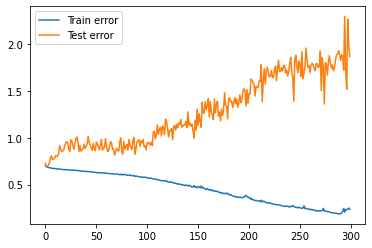

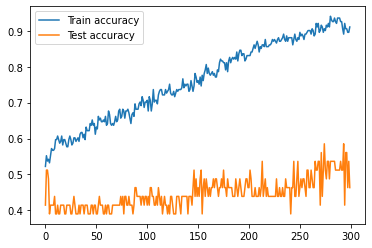

In [5]:
#With sentiment
fmodels, X_train_s, X_test_s, Y_test_s = modelfn(df, use_sentiment=True)

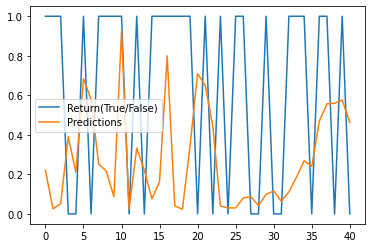

Precision:  0.5208333333333333
Recall:  0.5153846153846154
F1 score:  0.42674772036474173
Accuracy:  0.43902439024390244


In [6]:
#Without Sentiment
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import numpy as np
outputs_ns = fmodelns.predict(X_test_ns)
predictions_ns = outputs_ns[:, 0]
plt.plot(Y_test_ns, label='Return(True/False)')
plt.plot(predictions_ns, label='Predictions')
plt.legend()
plt.show()
y_pred = predictions_ns > 0.5
print('Precision: ', precision_score(Y_test_ns, y_pred , average="macro"))
print('Recall: ',  recall_score(Y_test_ns, y_pred , average="macro"))
print('F1 score: ', f1_score(Y_test_ns, y_pred , average="macro"))
print('Accuracy: ', accuracy_score(Y_test_ns, y_pred))

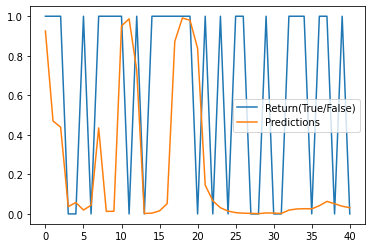

Precision:  0.571969696969697
Recall:  0.5487179487179488
F1 score:  0.4473039215686274
Accuracy:  0.4634146341463415


In [7]:
#With Sentiment
outputs_s = fmodels.predict(X_test_s)
predictions_s = outputs_s[:, 0]
plt.plot(Y_test_s, label='Return(True/False)')
plt.plot(predictions_s, label='Predictions')
plt.legend()
plt.show()
y_pred = predictions_s > 0.5
print('Precision: ', precision_score(Y_test_s, y_pred , average="macro"))
print('Recall: ',  recall_score(Y_test_s, y_pred , average="macro"))
print('F1 score: ', f1_score(Y_test_s, y_pred , average="macro"))
print('Accuracy: ', accuracy_score(Y_test_s, y_pred))